<a href="https://colab.research.google.com/github/jcj217-mc/Data_205_Final_Project/blob/main/Data_205_CT_Bail_Stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import packages
import pandas as pd
import numpy as np
import os 
import json
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("Accused_Pre-Trial_Inmates_in_Correctional_Facilities (1).csv", index_col=False)

In [ ]:
# Evaluating initial data 
df.head()

,DOWNLOAD DATE,IDENTIFIER,LATEST ADMISSION DATE,RACE,GENDER,AGE,BOND AMOUNT,OFFENSE,FACILITY,DETAINER
0,05/15/2020,ZZHCZBZZ,08/16/2018,BLACK,M,27,150000,CRIMINAL POSS OF PISTOL/REVOLVER DF,NEW HAVEN CC,NONE
1,05/15/2020,ZZHZZRLR,03/28/2019,HISPANIC,M,41,30100,VIOLATION OF PROBATION OR COND DISCHG,CORRIGAN CI,NONE
2,05/15/2020,ZZSRJBEE,04/03/2020,HISPANIC,M,21,150000,CRIMINAL ATTEMPT,CORRIGAN CI,NONE
3,05/15/2020,ZZHBJLRZ,01/15/2020,WHITE,M,36,50500,CRIM VIOL OF PROTECTIVE ORDER DF,BRIDGEPORT CC,NONE
4,05/15/2020,ZZSRRCHH,12/26/2018,HISPANIC,M,29,100000,CRIMINAL ATTEMPT,HARTFORD CC,NONE


In [ ]:
# change column names
df = df.rename(columns = {"DOWNLOAD DATE": "Download_Date", "LATEST ADMISSION DATE": "Date", "BOND AMOUNT":"Bond"})
df.head()

,Download_Date,IDENTIFIER,Date,RACE,GENDER,AGE,Bond,OFFENSE,FACILITY,DETAINER
0,05/15/2020,ZZHCZBZZ,08/16/2018,BLACK,M,27,150000,CRIMINAL POSS OF PISTOL/REVOLVER DF,NEW HAVEN CC,NONE
1,05/15/2020,ZZHZZRLR,03/28/2019,HISPANIC,M,41,30100,VIOLATION OF PROBATION OR COND DISCHG,CORRIGAN CI,NONE
2,05/15/2020,ZZSRJBEE,04/03/2020,HISPANIC,M,21,150000,CRIMINAL ATTEMPT,CORRIGAN CI,NONE
3,05/15/2020,ZZHBJLRZ,01/15/2020,WHITE,M,36,50500,CRIM VIOL OF PROTECTIVE ORDER DF,BRIDGEPORT CC,NONE
4,05/15/2020,ZZSRRCHH,12/26/2018,HISPANIC,M,29,100000,CRIMINAL ATTEMPT,HARTFORD CC,NONE


In [ ]:
df = df.drop([df.columns[-1]], axis='columns')
df.head(1)

,Download_Date,IDENTIFIER,Date,RACE,GENDER,AGE,Bond,OFFENSE,FACILITY
0,05/15/2020,ZZHCZBZZ,08/16/2018,BLACK,M,27,150000,CRIMINAL POSS OF PISTOL/REVOLVER DF,NEW HAVEN CC


In [ ]:
df.RACE.unique()

array(['BLACK', 'HISPANIC', 'WHITE', 'ASIAN', 'AMER IND'], dtype=object)

In [ ]:
# Drop Columns
df = df.drop(['Download_Date', 'IDENTIFIER', 'FACILITY'], axis = 'columns')
df.head(1)

,Date,RACE,GENDER,AGE,Bond,OFFENSE
0,08/16/2018,BLACK,M,27,150000,CRIMINAL POSS OF PISTOL/REVOLVER DF


In [ ]:
# Changing Date to datetime
df.Date = pd.to_datetime(df.Date)

In [ ]:
# add a column for Year
df['Year'] = df['Date'].dt.year
df.head(1)

,Date,RACE,GENDER,AGE,Bond,OFFENSE,Year
0,2018-08-16,BLACK,M,27,150000,CRIMINAL POSS OF PISTOL/REVOLVER DF,2018


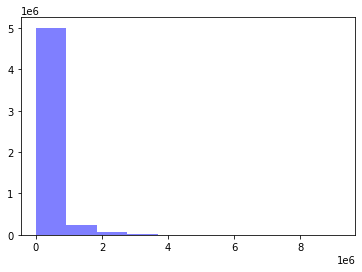

In [ ]:
# Check with histogram or Shapiro-Wilks test whether there is a normally distributed dependent variable 'bail'
plt.hist(df.Bond, facecolor='blue', alpha=0.5)

plt.show()

**Pair t-test**  but non-normal quant variable


In [ ]:
# Paired t-test
# subset the data
b = df[df.RACE == 'BLACK'].Bond
w = df[df.RACE == 'WHITE'].Bond
h = df[df.RACE == 'HISPANIC'].Bond
a = df[df.RACE == 'ASIAN'].Bond
na = df[df.RACE == 'AMER IND'].Bond


In [ ]:
print(b.head())


0     150000
8      10000
9      50000
10     70000
12     70050
Name: Bond, dtype: int64


In [ ]:
print(w.head())

3      50500
5     100000
7      50000
14    125200
15    200000
Name: Bond, dtype: int64


In [ ]:

b_sample = b.sample(n=100, random_state=1)


In [ ]:

w_sample = w.sample(n=100, random_state=2)

In [ ]:

h_sample = h.sample(n=100, random_state=3)

In [ ]:

a_sample = a.sample(n=100, random_state=4)

In [ ]:
na_sample = na.sample(n=100, random_state=4)

In [ ]:
from scipy.stats import ttest_rel

# Python paired sample t-test
ttest_rel(b_sample, w_sample)

Ttest_relResult(statistic=3.3095565074720565, pvalue=0.0013041417439851432)

**Wilcoxon**

The Wilcoxon signed-rank test is the non-parametric univariate test which is an alternative to the dependent t-test. It also is called the Wilcoxon T test, most commonly so when the statistic value is reported as a T value. Which scipy.stats.wilcoxon() uses for it’s calculation. This is the recommended test to use when the data violates the assumption of normality. 

Assumptions:

*   The dependent variable (DV) must be continuous which is measured on an ordinal or continuous scale
*   The paired observations are randomly and independently drawn
*The paired observations come from the same population





In [ ]:
import scipy.stats as stats

#perform the Wilcoxon-Signed Rank Test
stats.wilcoxon(w_sample, b_sample)

WilcoxonResult(statistic=1245.0, pvalue=4.670858248457777e-05)

With a p-value of 0.00088, much less than even an alpha of 0.01 the findings show that Racial category is statistically significant in relationship to Bond Amount.  We can reject the null hypothesis in support of the alternative.

**Kruskal-Wallis Test**

A Kruskal-Wallis Test is used to determine whether or not there is a statistically significant difference between the medians of three or more independent groups. It is considered to be the non-parametric equivalent of the One-Way ANOVA.

The Kruskal-Wallis Test uses the following null and alternative hypotheses:

The null hypothesis (H0): The median is equal across all groups.

The alternative hypothesis: (Ha): The median is not equal across all groups.

In [ ]:
from scipy import stats

#perform Kruskal-Wallis Test 
stats.kruskal(b_sample, w_sample, h_sample, a_sample, na_sample)



KruskalResult(statistic=20.976391550362102, pvalue=0.0003201004448367196)

In this case, the test statistic is 20.976 and the corresponding p-value is 0.00032. Since this p-value is less than 0.05, we can reject the null hypothesis that the median bail amount is the same for all five Race Categories. We have sufficient evidence to conclude that the Race of defendant  leads to statistically significant differences in bond amount.




**ANOVA**

Not applicable here because the Bond variable is not normally distributed.

In [ ]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(b_sample, w_sample, h_sample, a_sample, na_sample)
print(fvalue, pvalue)

4.873083915423211 0.0007321078597701251


**Correlation Heatmap**

           AGE      Bond      Year
AGE   1.000000 -0.075080 -0.004177
Bond -0.075080  1.000000 -0.022569
Year -0.004177 -0.022569  1.000000


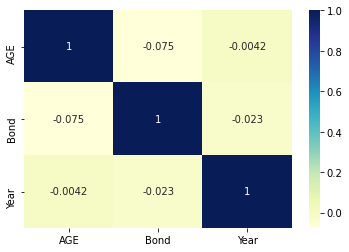

In [ ]:


# prints data that will be plotted
# columns shown here are selected by corr() since
# they are ideal for the plot
print(df.corr())
  
# plotting correlation heatmap
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import os 
from sklearn.feature_selection import chi2
from scipy import stats
import seaborn as sns
import matplotlib.pylab as plt

In [ ]:
# Extracting column names 
column_names=df.columns
# Assiging column names to row indexs 
chisqmatrix=pd.DataFrame(df,columns=column_names,index=column_names)
chisqmatrix

,Date,RACE,GENDER,AGE,Bond,OFFENSE,Year
Date,NaT,NaN,NaN,NaN,NaN,NaN,NaN
RACE,NaT,NaN,NaN,NaN,NaN,NaN,NaN
GENDER,NaT,NaN,NaN,NaN,NaN,NaN,NaN
AGE,NaT,NaN,NaN,NaN,NaN,NaN,NaN
Bond,NaT,NaN,NaN,NaN,NaN,NaN,NaN
OFFENSE,NaT,NaN,NaN,NaN,NaN,NaN,NaN
Year,NaT,NaN,NaN,NaN,NaN,NaN,NaN


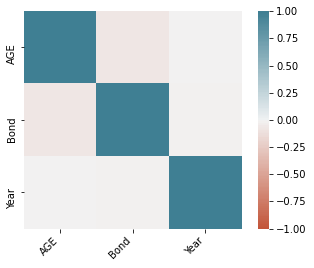

In [ ]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

**Logistic Regression**

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Features and Targets
X = df
y = df.Bond

In [ ]:
X.head()

,Date,RACE,GENDER,AGE,Bond,OFFENSE,Year
0,2018-08-16,BLACK,M,27,150000,CRIMINAL POSS OF PISTOL/REVOLVER DF,2018
1,2019-03-28,HISPANIC,M,41,30100,VIOLATION OF PROBATION OR COND DISCHG,2019
2,2020-04-03,HISPANIC,M,21,150000,CRIMINAL ATTEMPT,2020
3,2020-01-15,WHITE,M,36,50500,CRIM VIOL OF PROTECTIVE ORDER DF,2020
4,2018-12-26,HISPANIC,M,29,100000,CRIMINAL ATTEMPT,2018


In [ ]:
from sklearn import preprocessing 
label = preprocessing.LabelEncoder() 
 
X['RACE'] = label.fit_transform(X['RACE']) 
X['GENDER'] = label.fit_transform(X['GENDER']) 
X['OFFENSE'] = label.fit_transform(X['OFFENSE']) 

In [ ]:
X.head()

,Date,RACE,GENDER,AGE,Bond,OFFENSE,Year
0,2018-08-16,2,1,27,150000,76,2018
1,2019-03-28,3,1,41,30100,366,2019
2,2020-04-03,3,1,21,150000,65,2020
3,2020-01-15,4,1,36,50500,62,2020
4,2018-12-26,3,1,29,100000,65,2018


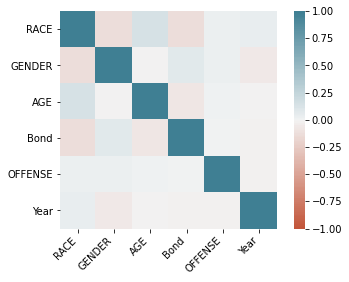

In [ ]:
corr = X.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

             RACE    GENDER       AGE      Bond   OFFENSE      Year
RACE     1.000000 -0.131030  0.145680 -0.123383  0.029118  0.042958
GENDER  -0.131030  1.000000 -0.003131  0.081449  0.024045 -0.055611
AGE      0.145680 -0.003131  1.000000 -0.075080  0.012960 -0.004177
Bond    -0.123383  0.081449 -0.075080  1.000000  0.006966 -0.022569
OFFENSE  0.029118  0.024045  0.012960  0.006966  1.000000 -0.018334
Year     0.042958 -0.055611 -0.004177 -0.022569 -0.018334  1.000000


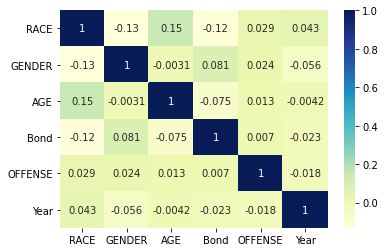

In [ ]:
# prints data that will be plotted
# columns shown here are selected by corr() since
# they are ideal for the plot
print(df.corr())
  
# plotting correlation heatmap
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

In [ ]:
X1 = df.drop(columns=['Bond','Date'])

In [ ]:
X = X1.sample(n=100, random_state=10)
y = y.sample(n=100, random_state=11)

In [ ]:
# Split the data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
#Instantiate, preprocess, train and predict(test)

LogReg = LogisticRegression()


scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

LogReg.fit(X_train,y_train)


y_pred=LogReg.predict(X_test)

In [ ]:
print('Classes', LogReg.classes_)
print('Intercept',LogReg.intercept_)
print("Coefficients", LogReg.coef_ )

Classes [    500    2500    5000    7000   10000   11000   15000   20000   25000
   26500   27500   30000   32000   40000   41000   50000   55000   60000
   70000   71500   75000   80000  100000  100050  110000  110075  135200
  150000  155000  200000  210000  212000  250000  260000  275000  300000
  400000  410000  475000  500000  509000  750000  750050  780000 1000000
 1150000 2001000 2200000]
Intercept [ 0.04801307 -0.93471739  1.20549232 -0.63509883 -0.97402906 -0.64779182
  0.62781318  1.27541992  0.87675767  0.15490229 -0.33114309 -0.32254922
 -0.72313574  0.59904899 -0.11220917  0.98768878 -0.33001129  0.36966852
  0.17377637 -0.1312112   0.66079965 -0.17477772  0.99072057 -0.25234897
  0.29969894 -0.15480608 -0.30373791 -0.15919131 -0.67152946  0.19639096
 -0.06563462  0.01875793  0.73014493 -0.85645328 -0.25741836 -0.01542086
 -0.1312112  -0.21233154 -0.27762526  1.15791389 -0.51275071  0.0074722
 -0.12951669 -0.97156977  0.67121902 -0.23661894 -0.4646461  -0.0622136 ]
Coeffic

In [ ]:
print("Accuracy", LogReg.score(X_test, y_test))
print(classification_report(y_test, LogReg.predict(X_test)))

Accuracy 0.04
              precision    recall  f1-score   support

        1000       0.00      0.00      0.00         1
        1500       0.00      0.00      0.00         1
        5000       0.00      0.00      0.00         2
       10000       0.00      0.00      0.00         1
       15000       0.50      0.50      0.50         2
       16000       0.00      0.00      0.00         1
       20000       0.00      0.00      0.00         1
       25000       0.00      0.00      0.00         0
       32000       0.00      0.00      0.00         0
       50000       0.00      0.00      0.00         1
       53000       0.00      0.00      0.00         1
       60000       0.00      0.00      0.00         0
       75000       0.00      0.00      0.00         0
       75100       0.00      0.00      0.00         1
      100000       0.00      0.00      0.00         2
      100300       0.00      0.00      0.00         1
      150000       0.00      0.00      0.00         2
      150100 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 

In [ ]:
df.head()

,Date,RACE,GENDER,AGE,Bond,OFFENSE,Year
0,2018-08-16,2,1,27,150000,76,2018
1,2019-03-28,3,1,41,30100,366,2019
2,2020-04-03,3,1,21,150000,65,2020
3,2020-01-15,4,1,36,50500,62,2020
4,2018-12-26,3,1,29,100000,65,2018


In [ ]:
X2 = df.iloc[:,1:2]

In [ ]:
X3 = X2.sample(n=100, random_state=12)


In [ ]:
X3.head()

,RACE
3380021,3
2527381,3
4716046,2
2478349,3
1956422,4


In [ ]:
# Split the data into train and test
X3_train,X3_test,y_train,y_test=train_test_split(X3,y,test_size=0.25,random_state=0)

In [ ]:
#Instantiate, preprocess, train and predict(test)

LogReg = LogisticRegression()


scaler = preprocessing.StandardScaler()
X3_train = scaler.fit_transform(X_train)
X3_test = scaler.transform(X_test)

LogReg.fit(X3_train,y_train)


y_pred=LogReg.predict(X3_test)

In [ ]:
print('Classes', LogReg.classes_)
print('Intercept',LogReg.intercept_)
print("Coefficients", LogReg.coef_ )

Classes [    500    2500    5000    7000   10000   11000   15000   20000   25000
   26500   27500   30000   32000   40000   41000   50000   55000   60000
   70000   71500   75000   80000  100000  100050  110000  110075  135200
  150000  155000  200000  210000  212000  250000  260000  275000  300000
  400000  410000  475000  500000  509000  750000  750050  780000 1000000
 1150000 2001000 2200000]
Intercept [ 0.04801307 -0.93471739  1.20549232 -0.63509883 -0.97402906 -0.64779182
  0.62781318  1.27541992  0.87675767  0.15490229 -0.33114309 -0.32254922
 -0.72313574  0.59904899 -0.11220917  0.98768878 -0.33001129  0.36966852
  0.17377637 -0.1312112   0.66079965 -0.17477772  0.99072057 -0.25234897
  0.29969894 -0.15480608 -0.30373791 -0.15919131 -0.67152946  0.19639096
 -0.06563462  0.01875793  0.73014493 -0.85645328 -0.25741836 -0.01542086
 -0.1312112  -0.21233154 -0.27762526  1.15791389 -0.51275071  0.0074722
 -0.12951669 -0.97156977  0.67121902 -0.23661894 -0.4646461  -0.0622136 ]
Coeffic

In [ ]:
print("Accuracy", LogReg.score(X3_test, y_test))
print(classification_report(y_test, LogReg.predict(X3_test)))

Accuracy 0.04
              precision    recall  f1-score   support

        1000       0.00      0.00      0.00         1
        1500       0.00      0.00      0.00         1
        5000       0.00      0.00      0.00         2
       10000       0.00      0.00      0.00         1
       15000       0.50      0.50      0.50         2
       16000       0.00      0.00      0.00         1
       20000       0.00      0.00      0.00         1
       25000       0.00      0.00      0.00         0
       32000       0.00      0.00      0.00         0
       50000       0.00      0.00      0.00         1
       53000       0.00      0.00      0.00         1
       60000       0.00      0.00      0.00         0
       75000       0.00      0.00      0.00         0
       75100       0.00      0.00      0.00         1
      100000       0.00      0.00      0.00         2
      100300       0.00      0.00      0.00         1
      150000       0.00      0.00      0.00         2
      150100 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 

ValueError: ignored

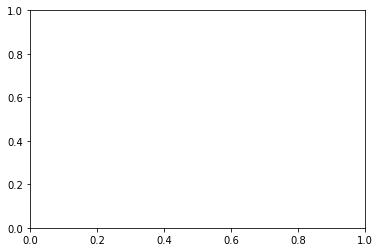

In [ ]:
plt.scatter(X_train, y_train, color='red') # plotting the observation line
 
plt.plot(X3_train, regressor.predict(X3_train), color='blue') # plotting the regression line
 
plt.title("Salary vs Experience (Training set)") # stating the title of the graph
 
plt.xlabel("Years of experience") # adding the name of x-axis
plt.ylabel("Salaries") # adding the name of y-axis
plt.show() # specifies end of graph

**Visualizations**


In [ ]:

df_2015 = df[df.Year == 2015]
df_2015

,Date,RACE,GENDER,AGE,Bond,OFFENSE,Year
109,2015-06-15,3,1,48,75000,321,2015
250,2015-11-12,3,1,30,50,262,2015
380,2015-11-24,3,1,30,75000,301,2015
467,2015-12-22,4,1,30,100000,315,2015
564,2015-04-14,2,1,22,650000,27,2015
...,...,...,...,...,...,...,...
5351333,2015-08-24,2,1,45,500000,313,2015
5351460,2015-11-03,2,1,26,1035050,65,2015
5351482,2015-08-16,4,1,54,25000,40,2015
5351674,2015-09-09,2,1,35,205050,36,2015


In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty='none')
clf.fit(df_2015[['RACE']],df_2015[['Bond']].values)
odds_ratio=np.exp(clf.coef_)

print(odds_ratio)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[1.18277437e+00]
 [1.20317112e+00]
 [2.94557605e+00]
 [5.18369194e+00]
 [5.44857264e+00]
 [2.20248948e+00]
 [5.20081764e-02]
 [8.90814130e-02]
 [2.35754841e+00]
 [1.63202925e+01]
 [4.00614211e+00]
 [3.25590916e+00]
 [7.44265311e-01]
 [1.58682922e+00]
 [2.56811841e+00]
 [1.98154250e+00]
 [6.06453240e-01]
 [3.57093031e+00]
 [6.41763830e-05]
 [1.61171121e+00]
 [6.99826445e-01]
 [6.60045062e-01]
 [1.67597104e+00]
 [3.34905887e+00]
 [4.58845387e-01]
 [1.67915772e+00]
 [5.76475863e-01]
 [2.00772356e+00]
 [1.08838484e+00]
 [1.49202378e-01]
 [8.41157843e+00]
 [1.01035856e-01]
 [2.60435861e+00]
 [2.87075838e+00]
 [4.71816685e+01]
 [6.54810827e-01]
 [2.55118212e+00]
 [2.28108942e+00]
 [1.02979650e+01]
 [3.36467645e+00]
 [6.92223136e-01]
 [2.49533568e+00]
 [3.99106799e-02]
 [1.38757782e+00]
 [6.29448911e+00]
 [6.54810827e-01]
 [4.25602575e-01]
 [1.46347460e-01]
 [6.65983370e+00]
 [3.23994222e+00]
 [1.08169662e+00]
 [7.40330461e-01]
 [3.94496606e+00]
 [8.90814130e-02]
 [3.05870096e+00]
 [2.900422

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
829/9

92.11111111111111